# EDA of Nigerian Education, Visualizations and Insights
Date Created: 26th Dec 22

## Importing all necessary libraries

In [89]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the Dataset

In [90]:
# Import the data
# Couldn't import as a csv file so changed data to excel format and then imported 
# ngedu_facilities= pd.read_excel("educational-facilities-in-nigeria.xlsx")

ngedu_facilities= pd.read_excel("educational-facilities-in-nigeria - Copy.xlsx")

In [91]:
pd.set_option('display.max_columns', 30) # to display full columns
ngedu_facilities

,facility_name,facility_type_display,improved_water_supply,improved_sanitation,chalkboard_each_classroom_yn,num_tchrs_with_nce,num_tchr_full_time,num_students_total,num_classrms_total,phcn_electricity,num_toilets_total,num_students_male,num_students_female,num_tchrs_male,num_tchrs_female,date_of_survey,education_type,facility_id,community,ward,management,sector,formhub_photo_id,gps,survey_id,unique_lga,latitude,longitude
0,CPS SWALI,Primary school only,1.0,1.0,0.0,9.0,9.0,776.0,12.0,0.0,21.0,383.0,393.0,5.0,4.0,2014-03-04,formal_only,EIRJK,Swali,3,public,education,1393404015008.jpg,4.91691036 6.27412844 31.5 5.0,51885096-65a1-4f1f-8c2a-3b11d9ae40bb,bayelsa_yenagoa,4.916910,6.274128
1,NANA Basic Academy,Primary and Junior Secondary school combined,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,2014-05-02,formal_only,ENQHE,Mpape,Dutse,private,education,1396960914896.jpg,9.140918333333333 7.496761666666667 697.0 4.5,7f3ea41a-e4cb-41dd-85fc-5fa54c42d09f,fct_bwari,9.140918,7.496762
2,L.E.A Primary School Pabeyi,Primary school only,1.0,1.0,0.0,9.0,11.0,283.0,9.0,0.0,2.0,185.0,98.0,9.0,2.0,2014-05-02,formal_only,EDJJK,Pabeyi,Dobi,public,education,1397575395444.jpg,9.174855 7.0220616666666675 236.8 5.0,56f2e625-ec43-4c39-97a8-d6379dceefa2,fct_gwagwalada,9.174855,7.022062
3,L.E.A.PrimarySchoolPagadna,Primary school only,0.0,1.0,0.0,4.0,5.0,247.0,7.0,0.0,2.0,147.0,100.0,5.0,0.0,2014-04-25,formal_only,ELOOD,Pagadna,Dobi,public,education,1398262573409.jpg,9.115846666666666 6.962314999999999 216.5 4.4,2932eda8-64b1-4068-8412-3b2e099062fc,fct_gwagwalada,9.115847,6.962315
4,Syflora Academy,Primary school only,0.0,1.0,1.0,4.0,8.0,66.0,10.0,1.0,4.0,29.0,37.0,2.0,6.0,2014-04-25,formal_only,EZJOH,Mpape,Dutse,private,education,1396959110576.jpg,9.141155 7.499665000000001 693.2 4.7,e17acb1e-364a-4a90-9384-0d612bb240c5,fct_bwari,9.141155,7.499665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98662,Liberty Primary School,Pre-primary and Primary school combined,1.0,1.0,1.0,10.0,11.0,449.0,9.0,0.0,6.0,199.0,250.0,3.0,8.0,2014-04-09,formal_only,EMWBJ,Atan,Atan,private,education,1396871679634.jpg,6.66737138 3.09158342 74.0 5.0,010545d1-8fed-41fe-bcae-c142046a04e3,ogun_ado_odo_ota,6.667371,3.091583
98663,Anfani Primary School,Primary school only,1.0,1.0,0.0,8.0,9.0,253.0,8.0,0.0,6.0,188.0,65.0,9.0,0.0,2014-04-13,formal_only,EIEMQ,Anfani,Nasarawa,public,education,1396966652017.jpg,9.924088236017527 4.634761001792765 192.104372...,5d81b15f-a114-4987-adce-70b67744f3ad,niger_magama,9.924088,4.634761
98664,OLUMAWU BASIC SCHOOL,Pre-primary and Primary school combined,1.0,1.0,1.0,77.0,77.0,567.0,40.0,1.0,48.0,296.0,271.0,40.0,37.0,2014-05-02,formal_only,EAFKM,WUSE 2,WUSE II,private,education,1398257399697.jpg,9.071785 7.477803333333332 474.9 5.0,6d63ceb8-bca5-4702-8313-41944e2d2dbd,fct_municipal_area_council,9.071785,7.477803
98665,UBE Akudu Karreh,Pre-primary and Primary school combined,0.0,0.0,0.0,3.0,10.0,330.0,6.0,0.0,0.0,180.0,150.0,5.0,5.0,2014-05-21,formal_only,EZLFV,Akudu Akarreh,Karreh,public,education,1394973132370.jpg,10.77455242 8.36796434 744.0 81.0,e22ff822-bf51-4a22-81b8-32ba8642b0f7,kaduna_kubau,10.774552,8.367964


In [92]:
ngedu_facilities.dtypes

facility_name                           object
facility_type_display                   object
improved_water_supply                  float64
improved_sanitation                    float64
chalkboard_each_classroom_yn           float64
num_tchrs_with_nce                     float64
num_tchr_full_time                     float64
num_students_total                     float64
num_classrms_total                     float64
phcn_electricity                       float64
num_toilets_total                      float64
num_students_male                      float64
num_students_female                    float64
num_tchrs_male                         float64
num_tchrs_female                       float64
date_of_survey                  datetime64[ns]
education_type                          object
facility_id                             object
community                               object
ward                                    object
management                              object
sector       

In [93]:
# Dropping date of survey because it isn't needed
ngedu_facilities= ngedu_facilities.drop("date_of_survey", axis=1)

In [94]:
ngedu_facilities.dtypes

facility_name                    object
facility_type_display            object
improved_water_supply           float64
improved_sanitation             float64
chalkboard_each_classroom_yn    float64
num_tchrs_with_nce              float64
num_tchr_full_time              float64
num_students_total              float64
num_classrms_total              float64
phcn_electricity                float64
num_toilets_total               float64
num_students_male               float64
num_students_female             float64
num_tchrs_male                  float64
num_tchrs_female                float64
education_type                   object
facility_id                      object
community                        object
ward                             object
management                       object
sector                           object
formhub_photo_id                 object
gps                              object
survey_id                        object
unique_lga                       object


## Cleaning the dataset

### Checking the missing values

In [95]:
ngedu_facilities.isna()

,facility_name,facility_type_display,improved_water_supply,improved_sanitation,chalkboard_each_classroom_yn,num_tchrs_with_nce,num_tchr_full_time,num_students_total,num_classrms_total,phcn_electricity,num_toilets_total,num_students_male,num_students_female,num_tchrs_male,num_tchrs_female,education_type,facility_id,community,ward,management,sector,formhub_photo_id,gps,survey_id,unique_lga,latitude,longitude
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,True,True,True,True,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98662,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
98663,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
98664,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
98665,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [96]:
ngedu_facilities.isna().sum()

facility_name                    214
facility_type_display            903
improved_water_supply            279
improved_sanitation              297
chalkboard_each_classroom_yn    2161
num_tchrs_with_nce              3530
num_tchr_full_time              2164
num_students_total              5262
num_classrms_total              3292
phcn_electricity                 277
num_toilets_total               2962
num_students_male               4375
num_students_female             4346
num_tchrs_male                  3680
num_tchrs_female                3319
education_type                   221
facility_id                        0
community                        239
ward                             771
management                      1223
sector                             0
formhub_photo_id                   0
gps                                0
survey_id                          0
unique_lga                         1
latitude                           0
longitude                          0
d

In [97]:
len(ngedu_facilities["facility_name"])

98667

### Removing the missing values

In [98]:
ngedu_facilities= ngedu_facilities.dropna()

In [99]:
ngedu_facilities.isna().sum()

facility_name                   0
facility_type_display           0
improved_water_supply           0
improved_sanitation             0
chalkboard_each_classroom_yn    0
num_tchrs_with_nce              0
num_tchr_full_time              0
num_students_total              0
num_classrms_total              0
phcn_electricity                0
num_toilets_total               0
num_students_male               0
num_students_female             0
num_tchrs_male                  0
num_tchrs_female                0
education_type                  0
facility_id                     0
community                       0
ward                            0
management                      0
sector                          0
formhub_photo_id                0
gps                             0
survey_id                       0
unique_lga                      0
latitude                        0
longitude                       0
dtype: int64

In [100]:
ngedu_facilities

,facility_name,facility_type_display,improved_water_supply,improved_sanitation,chalkboard_each_classroom_yn,num_tchrs_with_nce,num_tchr_full_time,num_students_total,num_classrms_total,phcn_electricity,num_toilets_total,num_students_male,num_students_female,num_tchrs_male,num_tchrs_female,education_type,facility_id,community,ward,management,sector,formhub_photo_id,gps,survey_id,unique_lga,latitude,longitude
0,CPS SWALI,Primary school only,1.0,1.0,0.0,9.0,9.0,776.0,12.0,0.0,21.0,383.0,393.0,5.0,4.0,formal_only,EIRJK,Swali,3,public,education,1393404015008.jpg,4.91691036 6.27412844 31.5 5.0,51885096-65a1-4f1f-8c2a-3b11d9ae40bb,bayelsa_yenagoa,4.916910,6.274128
2,L.E.A Primary School Pabeyi,Primary school only,1.0,1.0,0.0,9.0,11.0,283.0,9.0,0.0,2.0,185.0,98.0,9.0,2.0,formal_only,EDJJK,Pabeyi,Dobi,public,education,1397575395444.jpg,9.174855 7.0220616666666675 236.8 5.0,56f2e625-ec43-4c39-97a8-d6379dceefa2,fct_gwagwalada,9.174855,7.022062
3,L.E.A.PrimarySchoolPagadna,Primary school only,0.0,1.0,0.0,4.0,5.0,247.0,7.0,0.0,2.0,147.0,100.0,5.0,0.0,formal_only,ELOOD,Pagadna,Dobi,public,education,1398262573409.jpg,9.115846666666666 6.962314999999999 216.5 4.4,2932eda8-64b1-4068-8412-3b2e099062fc,fct_gwagwalada,9.115847,6.962315
4,Syflora Academy,Primary school only,0.0,1.0,1.0,4.0,8.0,66.0,10.0,1.0,4.0,29.0,37.0,2.0,6.0,formal_only,EZJOH,Mpape,Dutse,private,education,1396959110576.jpg,9.141155 7.499665000000001 693.2 4.7,e17acb1e-364a-4a90-9384-0d612bb240c5,fct_bwari,9.141155,7.499665
5,Nomadic Paiko Kore,Primary school only,1.0,1.0,1.0,4.0,6.0,120.0,6.0,0.0,2.0,44.0,76.0,5.0,1.0,formal_only,EULMF,Paiko Kore,Paiko,public,education,1398330459520.jpg,8.99146 7.0096750000000005 170.9 5.0,28d8fe5a-7a18-4d17-9f64-7ae095eb1c50,fct_gwagwalada,8.991460,7.009675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98662,Liberty Primary School,Pre-primary and Primary school combined,1.0,1.0,1.0,10.0,11.0,449.0,9.0,0.0,6.0,199.0,250.0,3.0,8.0,formal_only,EMWBJ,Atan,Atan,private,education,1396871679634.jpg,6.66737138 3.09158342 74.0 5.0,010545d1-8fed-41fe-bcae-c142046a04e3,ogun_ado_odo_ota,6.667371,3.091583
98663,Anfani Primary School,Primary school only,1.0,1.0,0.0,8.0,9.0,253.0,8.0,0.0,6.0,188.0,65.0,9.0,0.0,formal_only,EIEMQ,Anfani,Nasarawa,public,education,1396966652017.jpg,9.924088236017527 4.634761001792765 192.104372...,5d81b15f-a114-4987-adce-70b67744f3ad,niger_magama,9.924088,4.634761
98664,OLUMAWU BASIC SCHOOL,Pre-primary and Primary school combined,1.0,1.0,1.0,77.0,77.0,567.0,40.0,1.0,48.0,296.0,271.0,40.0,37.0,formal_only,EAFKM,WUSE 2,WUSE II,private,education,1398257399697.jpg,9.071785 7.477803333333332 474.9 5.0,6d63ceb8-bca5-4702-8313-41944e2d2dbd,fct_municipal_area_council,9.071785,7.477803
98665,UBE Akudu Karreh,Pre-primary and Primary school combined,0.0,0.0,0.0,3.0,10.0,330.0,6.0,0.0,0.0,180.0,150.0,5.0,5.0,formal_only,EZLFV,Akudu Akarreh,Karreh,public,education,1394973132370.jpg,10.77455242 8.36796434 744.0 81.0,e22ff822-bf51-4a22-81b8-32ba8642b0f7,kaduna_kubau,10.774552,8.367964


### Exploring the data

In [101]:
# We can see from the data below that public schools have more teachers with nce than others
# Followed by private schools and then faith-based
pd.crosstab(ngedu_facilities["management"], ngedu_facilities["num_tchrs_with_nce"])

num_tchrs_with_nce,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,...,80.0,82.0,83.0,84.0,85.0,86.0,89.0,90.0,91.0,92.0,93.0,94.0,96.0,97.0,98.0
management,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
faith_based,31,40,67,68,98,93,85,70,81,51,55,40,42,35,31,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
none,15,0,1,0,0,0,1,0,1,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
private,1145,953,1451,1621,1622,1658,1423,1152,1222,882,909,519,534,329,294,...,1,1,1,0,0,0,0,2,1,0,0,0,0,0,0
public,4520,8293,8065,7026,6030,5341,4303,3546,3093,2480,2028,1542,1442,1134,1049,...,5,1,2,2,2,2,2,1,1,2,1,1,1,3,1


In [102]:
# Checking the management column
ngedu_facilities["management"].head(50)

0          public
2          public
3          public
4         private
5          public
6          public
7          public
8          public
9         private
11        private
13        private
14        private
15        private
16        private
18        private
19         public
20         public
21         public
22         public
23         public
24         public
25         public
26         public
27         public
28         public
29         public
30         public
31         public
32         public
33         public
34         public
35         public
36         public
37         public
38         public
39        private
40        private
41        private
42         public
43         public
44         public
45         public
46        private
47         public
48        private
49        private
50    faith_based
51         public
52         public
53         public
Name: management, dtype: object

In [103]:
ngedu_facilities["management"].loc[:100]

0       public
2       public
3       public
4      private
5       public
        ...   
89      public
92     private
94      public
99      public
100    private
Name: management, Length: 88, dtype: object

In [104]:
# Checking for the data set where management is none
ngedu_facilities[ngedu_facilities["management"]== "none"]

,facility_name,facility_type_display,improved_water_supply,improved_sanitation,chalkboard_each_classroom_yn,num_tchrs_with_nce,num_tchr_full_time,num_students_total,num_classrms_total,phcn_electricity,num_toilets_total,num_students_male,num_students_female,num_tchrs_male,num_tchrs_female,education_type,facility_id,community,ward,management,sector,formhub_photo_id,gps,survey_id,unique_lga,latitude,longitude
78,Islamic Trist Fund Basic School,Information not available / Don't know,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,dk,EZUWW,Area 8,Garki,none,education,1393613720646.jpg,9.03654108 7.48992594 540.2999877929688 5.0,5713ed44-48be-427a-bf90-b1790909b436,fct_municipal_area_council,9.036541,7.489926
1316,Baptist LGEA school Ipee,Primary school only,1.0,1.0,0.0,12.0,20.0,169.0,12.0,0.0,2.0,91.0,78.0,2.0,18.0,formal_only,ESRIB,Ipee,Ipee,none,education,1393331357019.jpg,8.16284275 4.74926039 449.20001220703125 5.0,e81ded0c-55ec-4c76-940d-84bc96366a7c,kwara_oyun,8.162843,4.749260
1431,Annur lslamiyya School,Information not available / Don't know,0.0,0.0,0.0,0.0,3.0,90.0,2.0,0.0,0.0,70.0,20.0,3.0,0.0,religious_only,EZVLA,Shabra,Marafa West,none,education,1393086144703.jpg,12.99507077 4.73027076 254.0 5.0,81061a83-f957-4ed0-b16b-5017e939afc3,sokoto_silame,12.995071,4.730271
1636,Barr.Y Aliyu q.I.Nursery /primary,Information not available / Don't know,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,dk,EKEZM,Karewa,Karewa,none,education,1398857745993.jpg,9.25490539 12.44095168 185.5 5.0,ef5303b1-5e84-4eec-91e5-fbc861a8c7c0,adamawa_yola_north,9.254905,12.440952
3509,Ebenezer Radiant Nur/Pri School,Information not available / Don't know,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,dk,ERERL,Sango,Sango Ward,none,education,1397572655443.jpg,6.69192472 3.23671081 95.5999984741211 5.0,3ea0bb0b-5f30-41ec-9d63-5e6c6e220c39,ogun_ado_odo_ota,6.691925,3.236711
4043,Emmanuel Children School,Information not available / Don't know,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,dk,ECCOR,Ayetoro,Ayetoro Ward 3,none,education,1398766887347.jpg,7.24087793 3.01812737 112.4000015258789 5.0,b292755f-e67b-41fb-a730-22c812584293,ogun_yewa_north,7.240878,3.018127
8418,Ekwereazu commercial institute Eziama,Information not available / Don't know,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,dk,EFOWG,Eziama,Ekwereazu,none,education,1397216817930.jpg,5.586219869677012 7.25833045665443 190.5798286...,16bcb0d5-3015-49d0-bc02-3cf9191c1304,imo_ahiazu_mbaise,5.586220,7.258330
10131,Community Primary School Egendem Town,Primary school only,1.0,1.0,0.0,6.0,8.0,280.0,13.0,1.0,13.0,150.0,130.0,4.0,4.0,formal_only,EKHWL,Egendem Town,6,none,education,1397562983138.jpg,4.5283476 7.44230174 22.600000381469727 5.0,ac3b204a-2088-456b-a05d-63d894b1d067,rivers_andoni,4.528348,7.442302
11508,Adventist Nur/Primary School.Plot 6 Aguiyi lro...,Pre-primary and Primary school combined,1.0,1.0,0.0,17.0,17.0,398.0,11.0,1.0,2.0,202.0,196.0,3.0,14.0,formal_only,EQDMI,Umuobasi,Ubran 4,none,education,1398680764866.jpg,5.527893304824829 7.499531507492065 181.0 4.0,fd22db9c-b87a-46eb-995e-830497badca3,abia_umuahia_north,5.527893,7.499532
12734,Mautech Primary School,Primary school only,1.0,1.0,1.0,17.0,25.0,428.0,11.0,1.0,4.0,232.0,196.0,14.0,11.0,formal_only,EQNXK,Sangere,GIREI A,none,education,1397041533294.jpg,9.34592781 12.50776687 248.8000030517578 5.0,5f1d4314-0516-4af2-8984-cdfb3e7b7953,adamawa_grie,9.345928,12.507767


In [105]:
# Describing all the numeric data
ngedu_facilities.describe()

,improved_water_supply,improved_sanitation,chalkboard_each_classroom_yn,num_tchrs_with_nce,num_tchr_full_time,num_students_total,num_classrms_total,phcn_electricity,num_toilets_total,num_students_male,num_students_female,num_tchrs_male,num_tchrs_female,latitude,longitude
count,86256.000000,86256.000000,86256.000000,86256.000000,86256.000000,86256.000000,86256.000000,86256.000000,86256.000000,86256.000000,86256.000000,86256.000000,86256.000000,86256.000000,86256.000000
mean,0.380866,0.461719,0.463933,6.958032,11.446937,337.734847,8.265987,0.244945,2.527523,177.248968,160.485879,5.631956,5.814981,8.650964,7.188192
std,0.485603,0.498535,0.498700,7.701535,11.168934,344.256787,6.808839,0.430057,5.401313,193.466966,180.192271,5.792976,8.056187,2.391312,2.355186
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.293610,2.707594
25%,0.000000,0.000000,0.000000,2.000000,5.000000,120.000000,4.000000,0.000000,0.000000,60.000000,51.000000,2.000000,0.000000,6.692097,5.314111
50%,0.000000,0.000000,0.000000,5.000000,8.000000,225.000000,6.000000,0.000000,1.000000,115.000000,100.000000,4.000000,3.000000,8.165153,7.313308
75%,1.000000,1.000000,1.000000,9.000000,14.000000,420.000000,10.000000,0.000000,4.000000,220.000000,200.000000,7.000000,8.000000,10.628606,8.580856
max,1.000000,1.000000,1.000000,98.000000,186.000000,2355.000000,514.000000,1.000000,418.000000,2260.000000,2355.000000,98.000000,100.000000,13.875585,14.569126


In [106]:
# Group by the Make column and find the mean of the other columns 
ngedu_facilities.groupby(["management"]).mean()

,improved_water_supply,improved_sanitation,chalkboard_each_classroom_yn,num_tchrs_with_nce,num_tchr_full_time,num_students_total,num_classrms_total,phcn_electricity,num_toilets_total,num_students_male,num_students_female,num_tchrs_male,num_tchrs_female,latitude,longitude
management,,,,,,,,,,,,,,,
faith_based,0.685518,0.797772,0.363325,10.988003,15.257069,303.306769,11.092545,0.521851,5.371037,145.834619,157.472151,5.766067,9.491003,7.475119,7.542048
none,0.307692,0.269231,0.653846,5.423077,7.423077,155.307692,5.269231,0.230769,1.769231,74.576923,80.730769,2.923077,4.500000,8.382042,7.958013
private,0.582288,0.736520,0.587461,7.482991,13.108687,222.384987,10.207534,0.523587,3.971830,108.121788,114.263199,5.702052,7.406635,7.669003,6.427192
public,0.322364,0.383320,0.432950,6.749948,10.943117,368.895374,7.704866,0.166488,2.096688,196.107390,172.787984,5.612147,5.330970,8.931046,7.382928


## Converting education_type column to a constant syntax

Checked the data set and found out that the data values in the column(education_type) isn't constant
* We'll change all the values to lower_case
* Then remove all underscores(_) in the data

In [107]:
ngedu_facilities["education_type"]= ngedu_facilities["education_type"].str.lower()
ngedu_facilities

,facility_name,facility_type_display,improved_water_supply,improved_sanitation,chalkboard_each_classroom_yn,num_tchrs_with_nce,num_tchr_full_time,num_students_total,num_classrms_total,phcn_electricity,num_toilets_total,num_students_male,num_students_female,num_tchrs_male,num_tchrs_female,education_type,facility_id,community,ward,management,sector,formhub_photo_id,gps,survey_id,unique_lga,latitude,longitude
0,CPS SWALI,Primary school only,1.0,1.0,0.0,9.0,9.0,776.0,12.0,0.0,21.0,383.0,393.0,5.0,4.0,formal_only,EIRJK,Swali,3,public,education,1393404015008.jpg,4.91691036 6.27412844 31.5 5.0,51885096-65a1-4f1f-8c2a-3b11d9ae40bb,bayelsa_yenagoa,4.916910,6.274128
2,L.E.A Primary School Pabeyi,Primary school only,1.0,1.0,0.0,9.0,11.0,283.0,9.0,0.0,2.0,185.0,98.0,9.0,2.0,formal_only,EDJJK,Pabeyi,Dobi,public,education,1397575395444.jpg,9.174855 7.0220616666666675 236.8 5.0,56f2e625-ec43-4c39-97a8-d6379dceefa2,fct_gwagwalada,9.174855,7.022062
3,L.E.A.PrimarySchoolPagadna,Primary school only,0.0,1.0,0.0,4.0,5.0,247.0,7.0,0.0,2.0,147.0,100.0,5.0,0.0,formal_only,ELOOD,Pagadna,Dobi,public,education,1398262573409.jpg,9.115846666666666 6.962314999999999 216.5 4.4,2932eda8-64b1-4068-8412-3b2e099062fc,fct_gwagwalada,9.115847,6.962315
4,Syflora Academy,Primary school only,0.0,1.0,1.0,4.0,8.0,66.0,10.0,1.0,4.0,29.0,37.0,2.0,6.0,formal_only,EZJOH,Mpape,Dutse,private,education,1396959110576.jpg,9.141155 7.499665000000001 693.2 4.7,e17acb1e-364a-4a90-9384-0d612bb240c5,fct_bwari,9.141155,7.499665
5,Nomadic Paiko Kore,Primary school only,1.0,1.0,1.0,4.0,6.0,120.0,6.0,0.0,2.0,44.0,76.0,5.0,1.0,formal_only,EULMF,Paiko Kore,Paiko,public,education,1398330459520.jpg,8.99146 7.0096750000000005 170.9 5.0,28d8fe5a-7a18-4d17-9f64-7ae095eb1c50,fct_gwagwalada,8.991460,7.009675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98662,Liberty Primary School,Pre-primary and Primary school combined,1.0,1.0,1.0,10.0,11.0,449.0,9.0,0.0,6.0,199.0,250.0,3.0,8.0,formal_only,EMWBJ,Atan,Atan,private,education,1396871679634.jpg,6.66737138 3.09158342 74.0 5.0,010545d1-8fed-41fe-bcae-c142046a04e3,ogun_ado_odo_ota,6.667371,3.091583
98663,Anfani Primary School,Primary school only,1.0,1.0,0.0,8.0,9.0,253.0,8.0,0.0,6.0,188.0,65.0,9.0,0.0,formal_only,EIEMQ,Anfani,Nasarawa,public,education,1396966652017.jpg,9.924088236017527 4.634761001792765 192.104372...,5d81b15f-a114-4987-adce-70b67744f3ad,niger_magama,9.924088,4.634761
98664,OLUMAWU BASIC SCHOOL,Pre-primary and Primary school combined,1.0,1.0,1.0,77.0,77.0,567.0,40.0,1.0,48.0,296.0,271.0,40.0,37.0,formal_only,EAFKM,WUSE 2,WUSE II,private,education,1398257399697.jpg,9.071785 7.477803333333332 474.9 5.0,6d63ceb8-bca5-4702-8313-41944e2d2dbd,fct_municipal_area_council,9.071785,7.477803
98665,UBE Akudu Karreh,Pre-primary and Primary school combined,0.0,0.0,0.0,3.0,10.0,330.0,6.0,0.0,0.0,180.0,150.0,5.0,5.0,formal_only,EZLFV,Akudu Akarreh,Karreh,public,education,1394973132370.jpg,10.77455242 8.36796434 744.0 81.0,e22ff822-bf51-4a22-81b8-32ba8642b0f7,kaduna_kubau,10.774552,8.367964


In [115]:
# Removing all underscores now
ngedu_facilities["education_type"]= ngedu_facilities["education_type"].str.replace('[\_]','',regex= True)

In [130]:
# Removing all white spaces and trailing spaces
ngedu_facilities["education_type"]=ngedu_facilities["education_type"].str.replace(" ","") 

In [131]:
ngedu_facilities["education_type"].loc[:10]

0    formalonly
2    formalonly
3    formalonly
4    formalonly
5    formalonly
6    formalonly
7    formalonly
8    formalonly
9    formalonly
Name: education_type, dtype: object

In [ ]:
# If I were to replace a string in the data with something else
# ngedu_facilities["education_type"]= ngedu_facilities["education_type"].str.replace("")

## Visualizations in Seaborn based on Mangement(faith-based, private, public and none)

### Improved Water Supply

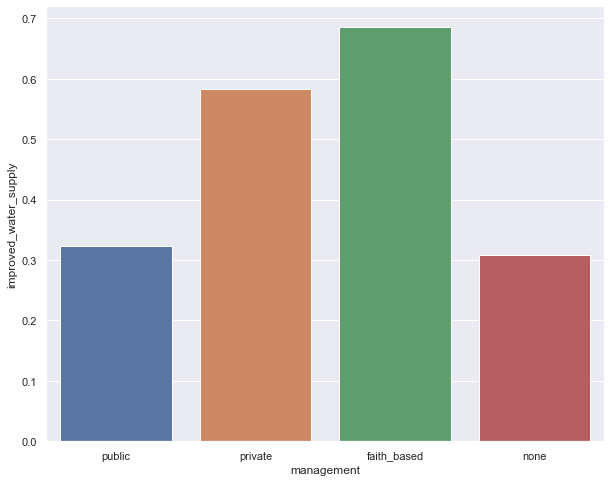

In [40]:
sns.set(rc={"figure.figsize": (10,8)})
ax= sns.barplot(x= "management", 
                y= "improved_water_supply", 
                data= ngedu_facilities,
               ci= None)

### Improved Sanitation

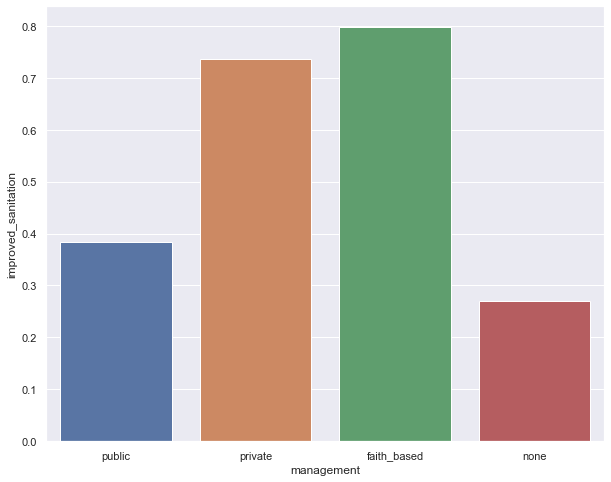

In [41]:
sns.set(rc= {"figure.figsize": (10,8)})
ax= sns.barplot(x= "management", 
                y= "improved_sanitation", 
                data= ngedu_facilities,
               ci= None)

### Chalkboard in each classroom

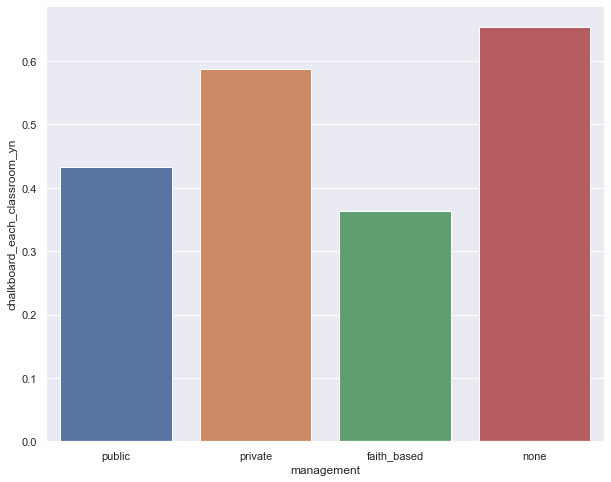

In [42]:
sns.set(rc= {"figure.figsize": (10,8)})
ax= sns.barplot(x= "management", 
                y= "chalkboard_each_classroom_yn", 
                data= ngedu_facilities,
               ci= None)

### Number of teachers with nce

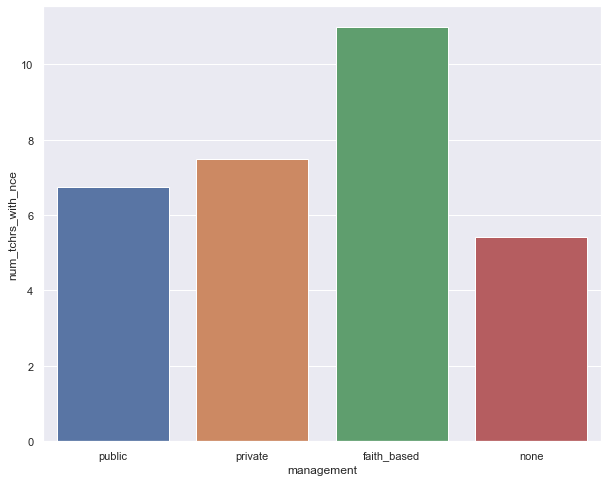

In [43]:
sns.set(rc= {"figure.figsize": (10,8)})
ax= sns.barplot(x= "management", 
                y= "num_tchrs_with_nce", 
                data= ngedu_facilities,
               ci=None)

### Number of students total

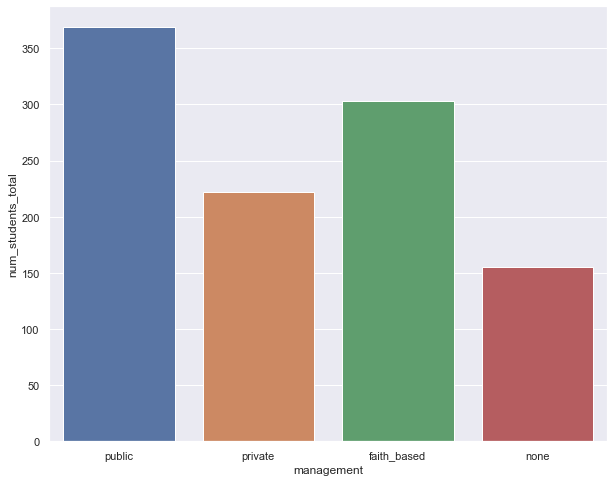

In [44]:
sns.set(rc= {"figure.figsize": (10,8)})
ax= sns.barplot(x= "management", 
                y= "num_students_total", 
                data= ngedu_facilities,
               ci= None)

### Number of Classrooms Total

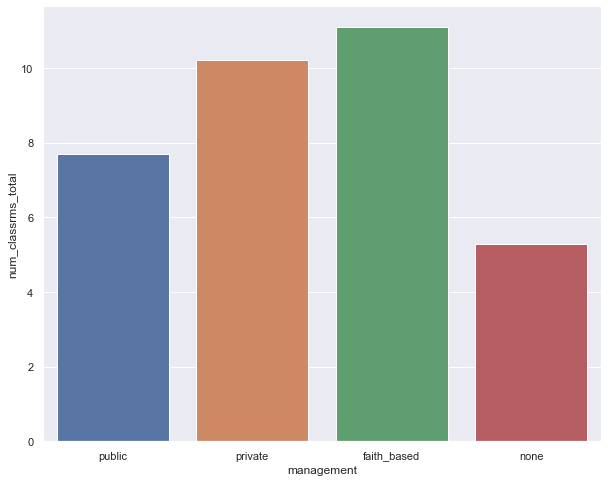

In [149]:
sns.set(rc= {"figure.figsize": (10,8)})
ax= sns.barplot(x= "management",
                y= "num_classrms_total", 
                data= ngedu_facilities,
               ci= None)

### PHCN Electricity distribution

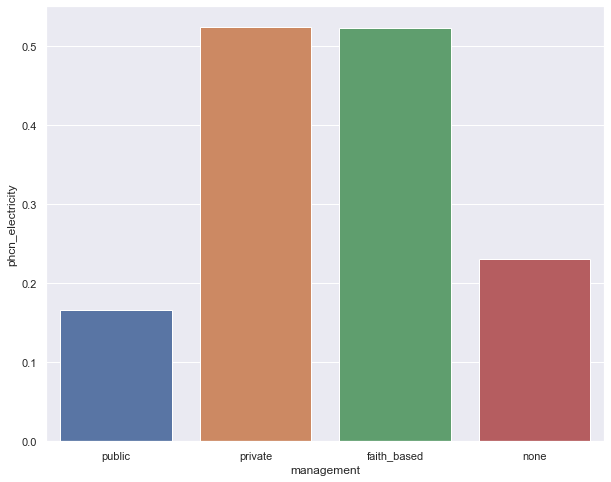

In [55]:
sns.set(rc= {"figure.figsize": (10,8)})
ax= sns.barplot(x= "management", 
                y= "phcn_electricity", 
                data= ngedu_facilities,
               ci= None)

### Number of Toilets

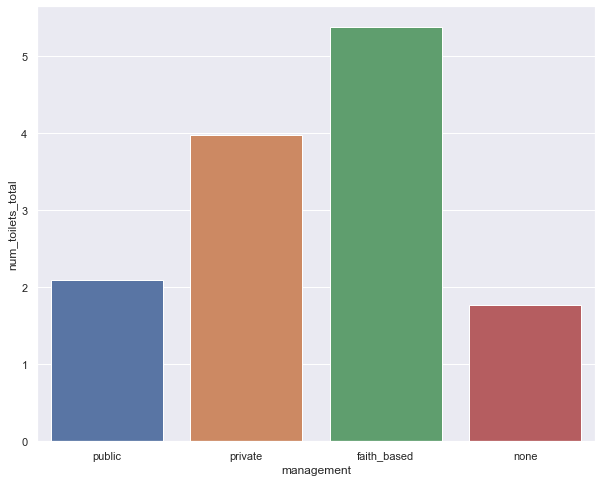

In [56]:
sns.set(rc= {"figure.figsize": (10,8)})
ax= sns.barplot(x= "management", 
                y= "num_toilets_total", 
                data= ngedu_facilities,
               ci= None)

### Relationship between (Number of Teachers Full Time) with (Number of Teachers with nce and Number of studets total) 

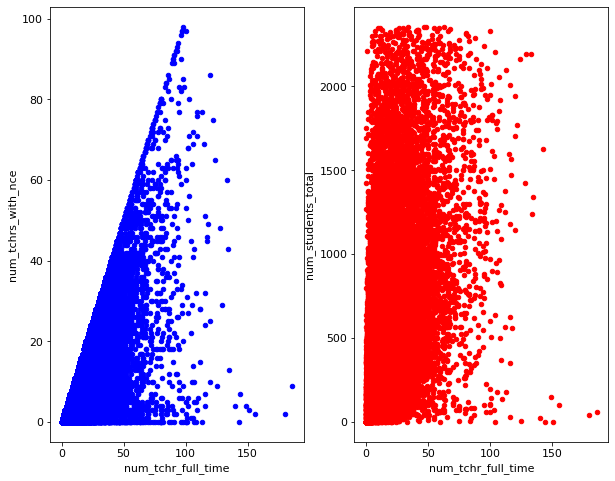

In [38]:
# Plot shows a trend where an increased number of teachers leads to increase in teachers with nce
# An increase in full time teachers oesn't affect student data
plt.rcParams['font.size']=11 
plt.rcParams['figure.figsize']=[10, 8] 
fig, axes= plt.subplots(nrows=1, ncols=2)
ngedu_facilities.plot(kind="scatter", x="num_tchr_full_time", y="num_tchrs_with_nce", ax= axes[0], color= "Blue");
ngedu_facilities.plot(kind="scatter", x="num_tchr_full_time", y="num_students_total", ax= axes[1], color= "Red");

In [123]:
ngedu_facilities_drop= ngedu_facilities.drop(["num_students_male", "num_students_female", "num_tchrs_male", "num_tchrs_female", "latitude", "longitude"], axis= 1)
ngedu_facilities_drop

,facility_name,facility_type_display,improved_water_supply,improved_sanitation,chalkboard_each_classroom_yn,num_tchrs_with_nce,num_tchr_full_time,num_students_total,num_classrms_total,phcn_electricity,num_toilets_total,education_type,facility_id,community,ward,management,sector,formhub_photo_id,gps,survey_id,unique_lga
0,CPS SWALI,Primary school only,1.0,1.0,0.0,9.0,9.0,776.0,12.0,0.0,21.0,formalonly,EIRJK,Swali,3,public,education,1393404015008.jpg,4.91691036 6.27412844 31.5 5.0,51885096-65a1-4f1f-8c2a-3b11d9ae40bb,bayelsa_yenagoa
2,L.E.A Primary School Pabeyi,Primary school only,1.0,1.0,0.0,9.0,11.0,283.0,9.0,0.0,2.0,formalonly,EDJJK,Pabeyi,Dobi,public,education,1397575395444.jpg,9.174855 7.0220616666666675 236.8 5.0,56f2e625-ec43-4c39-97a8-d6379dceefa2,fct_gwagwalada
3,L.E.A.PrimarySchoolPagadna,Primary school only,0.0,1.0,0.0,4.0,5.0,247.0,7.0,0.0,2.0,formalonly,ELOOD,Pagadna,Dobi,public,education,1398262573409.jpg,9.115846666666666 6.962314999999999 216.5 4.4,2932eda8-64b1-4068-8412-3b2e099062fc,fct_gwagwalada
4,Syflora Academy,Primary school only,0.0,1.0,1.0,4.0,8.0,66.0,10.0,1.0,4.0,formalonly,EZJOH,Mpape,Dutse,private,education,1396959110576.jpg,9.141155 7.499665000000001 693.2 4.7,e17acb1e-364a-4a90-9384-0d612bb240c5,fct_bwari
5,Nomadic Paiko Kore,Primary school only,1.0,1.0,1.0,4.0,6.0,120.0,6.0,0.0,2.0,formalonly,EULMF,Paiko Kore,Paiko,public,education,1398330459520.jpg,8.99146 7.0096750000000005 170.9 5.0,28d8fe5a-7a18-4d17-9f64-7ae095eb1c50,fct_gwagwalada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98662,Liberty Primary School,Pre-primary and Primary school combined,1.0,1.0,1.0,10.0,11.0,449.0,9.0,0.0,6.0,formalonly,EMWBJ,Atan,Atan,private,education,1396871679634.jpg,6.66737138 3.09158342 74.0 5.0,010545d1-8fed-41fe-bcae-c142046a04e3,ogun_ado_odo_ota
98663,Anfani Primary School,Primary school only,1.0,1.0,0.0,8.0,9.0,253.0,8.0,0.0,6.0,formalonly,EIEMQ,Anfani,Nasarawa,public,education,1396966652017.jpg,9.924088236017527 4.634761001792765 192.104372...,5d81b15f-a114-4987-adce-70b67744f3ad,niger_magama
98664,OLUMAWU BASIC SCHOOL,Pre-primary and Primary school combined,1.0,1.0,1.0,77.0,77.0,567.0,40.0,1.0,48.0,formalonly,EAFKM,WUSE 2,WUSE II,private,education,1398257399697.jpg,9.071785 7.477803333333332 474.9 5.0,6d63ceb8-bca5-4702-8313-41944e2d2dbd,fct_municipal_area_council
98665,UBE Akudu Karreh,Pre-primary and Primary school combined,0.0,0.0,0.0,3.0,10.0,330.0,6.0,0.0,0.0,formalonly,EZLFV,Akudu Akarreh,Karreh,public,education,1394973132370.jpg,10.77455242 8.36796434 744.0 81.0,e22ff822-bf51-4a22-81b8-32ba8642b0f7,kaduna_kubau


### Correlation Matrix using HeatMap

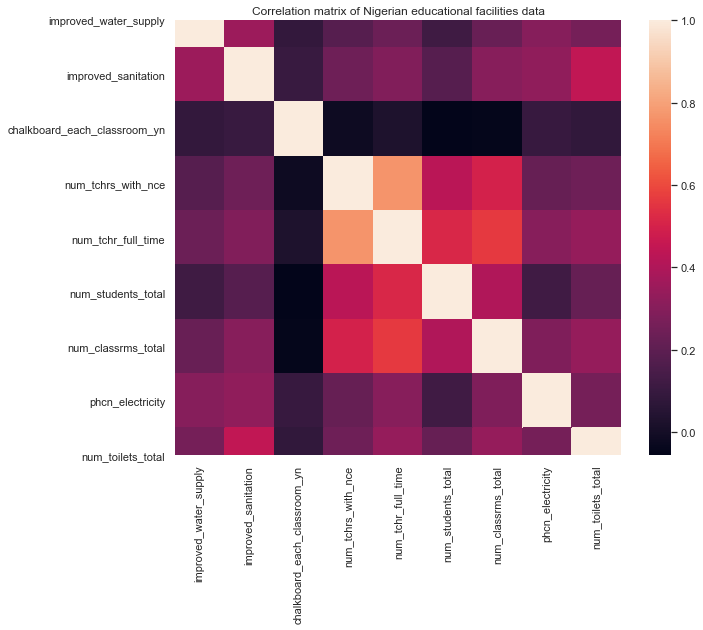

In [143]:
corr= ngedu_facilities_drop.corr()
sns.heatmap(corr)
plt.title("Correlation matrix of Nigerian educational facilities data")

plt.show();

### Education type trend of number of teachers with nce between all management sectors

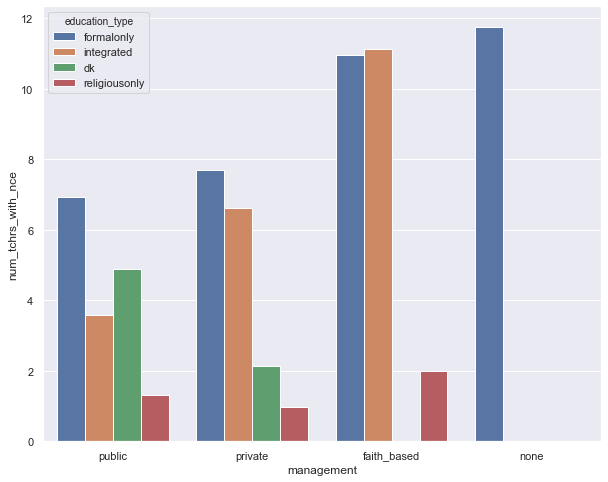

In [146]:

sns.set(rc= {"figure.figsize": (10,8)})
sns.barplot(x= ngedu_facilities["management"], y=ngedu_facilities["num_tchrs_with_nce"],
           hue= ngedu_facilities["education_type"],
           ci= None)

In [140]:
# Grouping data
ngedu_facilities.groupby("management").mean()["num_tchrs_with_nce"]

management
faith_based    10.988003
none            5.423077
private         7.482991
public          6.749948
Name: num_tchrs_with_nce, dtype: float64

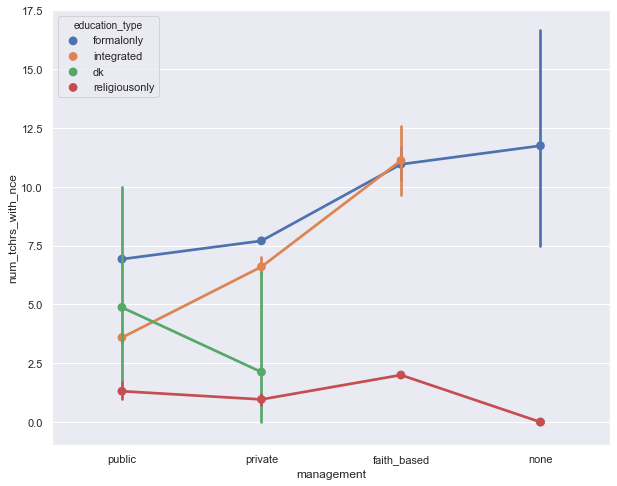

In [139]:
ngedu_facilities.groupby("management").mean()["num_tchrs_with_nce"]
sns.pointplot(x= "management", 
              y= "num_tchrs_with_nce",
             hue= "education_type",
             data= ngedu_facilities)

# Insights from Visualizations

## 1. Are there any correlations between the variables

* There's a positive correlation between number of full time teachers and nce qualified teachers

## 2. Qualified teachers in different types of education by management

* Faith based management has the highest number of formal, integrated and religious type nce qualified teachers of the three sectors 

* Private management has the second highest number of formal and integrated type nce qualified teachers but the lowest in the religious type

* Public management has the lowest number of formal and integrated type nce qualified teachers but the highest number of unidentified education type

## 3. Trends between nce qualified teachers, full-time teachers and total number of students
* Schools with more full-time teachers have `more NCE qualified teachers`
* Increased full-time teachers doesn't guarantee `increased number of students` 

## 4. School Facilities
* Faith-based schools have `better water supply` as well as `better sanitation`
* Unidentified schools have `more chalkboards in each classroom` followed by private schools
* Faith-based schools have the `highest number of classrooms`
* Private schools have the `highest PHCN electricity distribution` closely followed by faith-based schools
* Faith-based schools have the `highest number of toilets`

## 5. Number of students comparison in the management sectors
* Public schools have the `highest number of students`

## 6. Which management sector has the most qualified teachers
* Faith-based scholls have the `most NCE qualified teachers`